In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
pd.read_csv('df_train.csv')

,Unnamed: 0,word,ort,pho,wf,gr1,gr2,gr3,gr4,gr5,...,gr7,gr8,gr9,gr10,gr11,gr12,gr13,gr14,img,wn_idx
0,0,a,___a______,___^______,1100290.0,21811.0,19884.0,23168.0,23295.0,24495.0,...,24683.0,24761.0,24792.0,24828.0,24756.0,24584.0,22354.0,416415.0,4.198263,0
1,1,ace,___a_ce___,___es_____,117.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,28.0,4.500000,1
2,2,ache,___a_che__,___ek_____,27.0,6.0,7.0,6.0,7.0,5.0,...,3.0,3.0,3.0,2.0,2.0,1.0,0.0,96.0,3.800000,2
3,3,ached,___a_ched_,___ekt____,3.0,0.0,4.0,9.0,10.0,5.0,...,3.0,3.0,2.0,2.0,1.0,0.0,0.0,102.0,4.198263,3
4,4,aches,___a_ches_,___eks____,23.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.0,0.0,0.0,40.0,4.198263,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5856,5856,zoo,__zoo_____,__zu______,172.0,88.0,40.0,26.0,30.0,24.0,...,18.0,19.0,14.0,11.0,9.0,8.0,4.0,498.0,6.800000,6224
5857,5857,zoom,__zoom____,__zum_____,38.0,13.0,4.0,3.0,2.0,1.0,...,0.0,1.0,2.0,2.0,2.0,4.0,0.0,74.0,3.500000,6225
5858,5858,zoomed,__zoomed__,__zumd____,44.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,4.198263,6226
5859,5859,zooms,__zooms___,__zumz____,18.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,4.198263,6227


**Notation**
- Node input: $y(t)\in{}\mathbb{R}^{n}$
- Node output: $o(t)\in{}\mathbb{R}^{n}$
- Model Parameters:
  - Weights: $\mathbf{W}\in{}\mathbb{R}^{n\times{}n}$
  - Bias: $\vec{b}\in{}\mathbb{R}^{n}$
  - Activation: $f:\mathbb{R}^{n}\rightarrow{}\mathbb{R}^{n}$


**Time-Averaged Inputs** (Plaut et. al, 1996)
$$o(t)=\sigma{}(y(t))$$
$$x_{i}(t)=\mathbf{W}_{i}f(y(t))+\vec{b}_{i}$$
$$\frac{dy_{i}}{dt}=x_{i}(t)-y_{i}(t)$$
$$y_{i}(t+\eta{})=y_{i}(t)+\eta{}\frac{dy_{i}}{dt},\;\;y_{i}(0)=0$$

**Cleanup Units** (Ignoring the bias term)
$$o(t)=\sigma{}(y(t))$$
$$y(t_{i+1})=y(t_{i})+\eta{}(\mathbf{W}^{(1)}f(h(t_{i}))-y(t_{i})),\;\;y(0)=0$$
$$h(t_{i+1})=h(t_{i})+\eta{}(\mathbf{W}^{(2)}f(y(t_{i}))-h(t_{i})),\;\;h(0)=0$$
   - Loss Function
   $$L(t) \propto{} (\bar{y}\cdot{}log(o(t)))+((1-\bar{y})\cdot{}log(1-o(t))$$
   $$\nabla{}_{y}L(t)=\bar{y}\odot{}\frac{\sigma{}'(y(t))}{log(o(t))}-(1-\bar{y})\odot\frac{\sigma{}'(y(t))}{log(1-o(t))}$$
   - Derivatives
     - $t=0$ 
$$\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{k}(0)=0,\;\;\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}h_{k'}(0)=0$$

     - $t=1$  
$$\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{k}(1)=\delta{}_{k=i}\eta{}f(h_{j}(0)),\;\;\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}h_{k'}(1)=0$$
     
     - $t=2$ 
$$\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{k}(2)=(1-\eta{})\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{k}(1)+\delta{}_{k=i}\eta{}f(h_{j}(1))$$
$$\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}h_{k'}(2)=\eta{}\mathbf{W}^{(2)}_{k',i}f'(y_{i}(1))\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{i}(1)$$

     - $t=3$ 
$$\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{k}(3)=(1-\eta{})f'(y_{k}(2))\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{k}(2)+\delta{}_{k=i}\eta{}f(h_{j}(2))+\eta{}\sum_{z=1}^{n}\mathbf{W}^{(1)}_{i,n}\sigma{}'(h_{n}(2))\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}h_{n}(2)$$
$$\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}h_{k'}(3)=(1-\eta{})f'(h_{k'}(2))\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}h_{k'}(2)+\eta{}\mathbf{W}^{(2)}_{k',i}f'(y_{i}(2))\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{i}(2)$$

     - $t=t'\geq{}3$ 
$$\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{k}(t')=(1-\eta{})f'(y_{k}(t'-1))\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{k}(t'-1)+\delta{}_{k=i}\eta{}f(h_{j}(t'-1))+\eta{}\sum_{z=1}^{n}\mathbf{W}^{(1)}_{i,n}f'(h_{n}(t'-1))\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}h_{n}(t'-1)$$
$$\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}h_{k'}(t')=(1-\eta{})f'(h_{k'}(t'-1))\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}h_{k'}(t'-1)+\eta{}\mathbf{W}^{(2)}_{k',i}f'(y_{i}(t'-1))\frac{\delta{}}{\delta{}\mathbf{W}^{(1)}_{i,j}}y_{i}(t'-1)$$

## Phase 1 (Phonology & Semantics)

In [2]:
sigmoid_losses = torch.load('phase_1_baseline_losses')
lr_losses = torch.load('phase_1_lr_losses')

### Cleanup Units

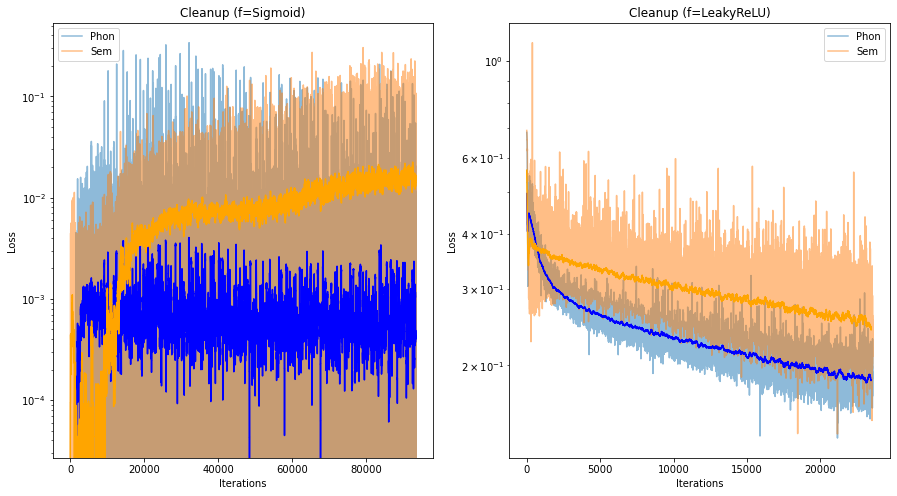

In [3]:
kernel = torch.ones(100)/100
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
cleanup_phon,cleanup_sem = np.array(sigmoid_losses[0])[1::,0],np.array(sigmoid_losses[0])[1::,1]

plt.semilogy(cleanup_phon,label='Phon',alpha=.5)
plt.semilogy(cleanup_sem,label='Sem',alpha=.5)

plt.semilogy(np.convolve(cleanup_phon,kernel,mode='valid'),color='blue')
plt.semilogy(np.convolve(cleanup_sem,kernel,mode='valid'),color='orange')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Cleanup (f=Sigmoid)');

plt.subplot(1,2,2)
cleanup_phon,cleanup_sem = np.array(lr_losses[0])[1::,0],np.array(lr_losses[0])[1::,1]

plt.semilogy(cleanup_phon,label='Phon',alpha=.5)
plt.semilogy(cleanup_sem,label='Sem',alpha=.5)

plt.semilogy(np.convolve(cleanup_phon,kernel,mode='valid'),color='blue')
plt.semilogy(np.convolve(cleanup_sem,kernel,mode='valid'),color='orange')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Cleanup (f=LeakyReLU)');

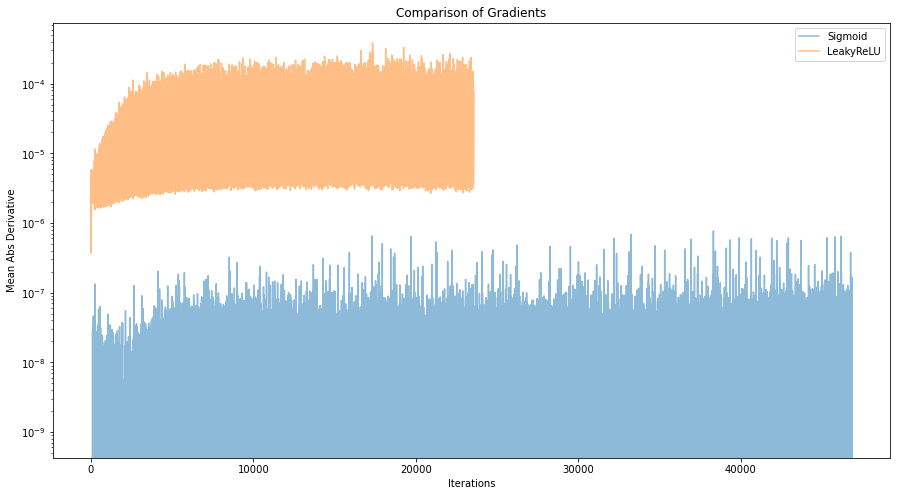

In [87]:
plt.figure(figsize=(15,8))

plt.semilogy(np.array(torch.load('phase_1_baseline_losses')[0])[:,-1],alpha=.5)
plt.semilogy(np.array(torch.load('phase_1_lr_losses')[0])[:,-1],alpha=.5)

plt.xlabel('Iterations')
plt.ylabel('Mean Abs Derivative')
plt.title('Comparison of Gradients')
plt.legend(labels=['Sigmoid','LeakyReLU']);

### P2S and S2P pathways

In [4]:
sigmoid_losses = torch.load('phase_1_baseline_losses')
lr_losses = torch.load('phase_1_lr_losses')

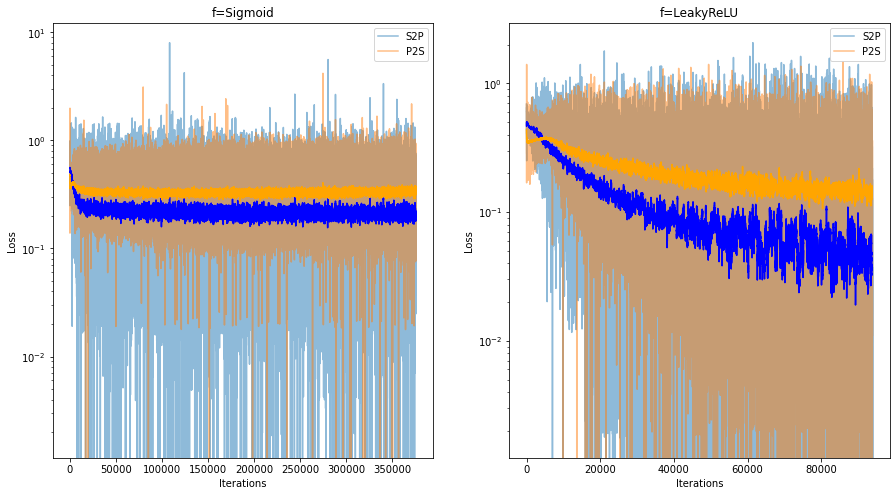

In [5]:
kernel = torch.ones(100)/100
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
cleanup_phon,cleanup_sem = np.array(sigmoid_losses[1])[1::,0],np.array(sigmoid_losses[1])[1::,1]

plt.semilogy(cleanup_phon,label='S2P',alpha=.5)
plt.semilogy(cleanup_sem,label='P2S',alpha=.5)

plt.semilogy(np.convolve(cleanup_phon,kernel,mode='valid'),color='blue')
plt.semilogy(np.convolve(cleanup_sem,kernel,mode='valid'),color='orange')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('f=Sigmoid');

plt.subplot(1,2,2)
cleanup_phon,cleanup_sem = np.array(lr_losses[1])[1::,0],np.array(lr_losses[1])[1::,1]

plt.semilogy(cleanup_phon,label='S2P',alpha=.5)
plt.semilogy(cleanup_sem,label='P2S',alpha=.5)

plt.semilogy(np.convolve(cleanup_phon,kernel,mode='valid'),color='blue')
plt.semilogy(np.convolve(cleanup_sem,kernel,mode='valid'),color='orange')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('f=LeakyReLU');

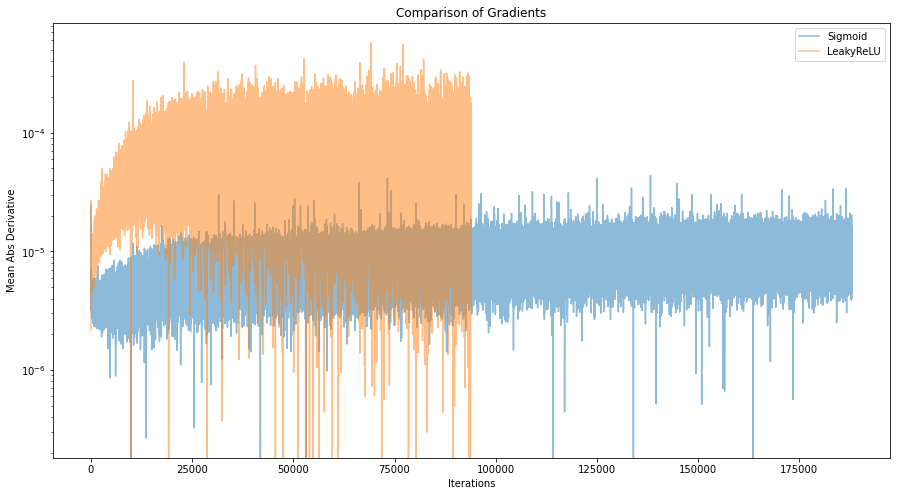

In [90]:
plt.figure(figsize=(15,8))

plt.semilogy(np.array(torch.load('phase_1_baseline_losses')[1])[:,-1],alpha=.5)
plt.semilogy(np.array(torch.load('phase_1_lr_losses')[1])[:,-1],alpha=.5)

plt.xlabel('Iterations')
plt.ylabel('Mean Abs Derivative')
plt.title('Comparison of Gradients')
plt.legend(labels=['Sigmoid','LeakyReLU']);

### Accuracies

In [91]:
acc = np.array(torch.load('phase_1_lr_accuracy'))

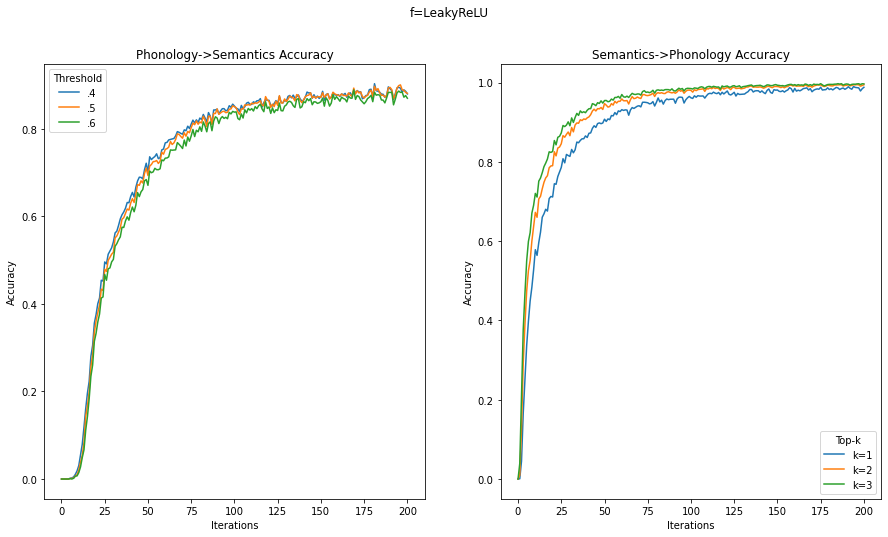

In [92]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
x = np.arange(acc.shape[0]) #* len(s2p)/acc.shape[0]

plt.plot(x,acc[:,1,0],label='.4')
plt.plot(x,acc[:,1,1],label='.5')
plt.plot(x,acc[:,1,2],label='.6')

plt.title('Phonology->Semantics Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(title='Threshold')

plt.subplot(1,2,2)
x = np.arange(acc.shape[0]) #* len(s2p)/acc.shape[0]

plt.plot(x,acc[:,0,0],label='k=1')
plt.plot(x,acc[:,0,1],label='k=2')
plt.plot(x,acc[:,0,2],label='k=3')

plt.title('Semantics->Phonology Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(title='Top-k')

plt.suptitle('f=LeakyReLU');

In [6]:
acc = np.array(torch.load('phase_1_baseline_accuracy'))

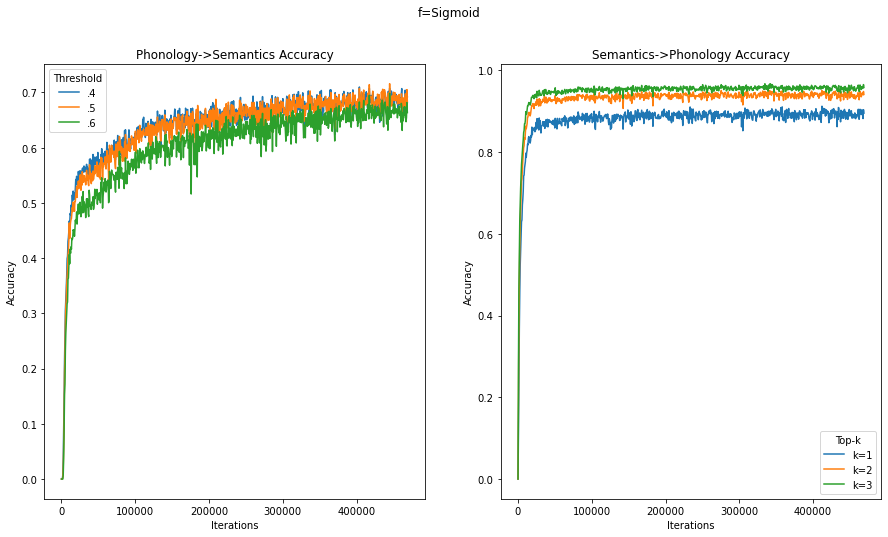

In [7]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
x = 5861/10 * np.arange(acc.shape[0]) #* len(s2p)/acc.shape[0]

plt.plot(x,acc[:,1,0],label='.4')
plt.plot(x,acc[:,1,1],label='.5')
plt.plot(x,acc[:,1,2],label='.6')

plt.title('Phonology->Semantics Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(title='Threshold')

plt.subplot(1,2,2)
x = 5861/10 * np.arange(acc.shape[0]) #* len(s2p)/acc.shape[0]

plt.plot(x,acc[:,0,0],label='k=1')
plt.plot(x,acc[:,0,1],label='k=2')
plt.plot(x,acc[:,0,2],label='k=3')

plt.title('Semantics->Phonology Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(title='Top-k')
plt.suptitle('f=Sigmoid');

![title](harm_and_siedenberg.png)

## Phase 2 (Orthography)

In [95]:
sigmoid_losses = torch.load('phase_2_baseline_losses')
lr_losses = torch.load('phase_2_lr_losses')

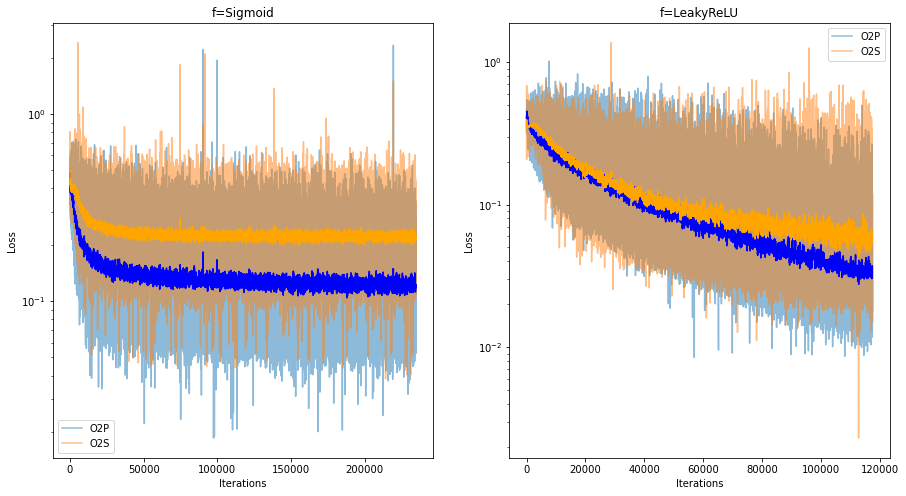

In [96]:
kernel = torch.ones(100)/100
plt.figure(figsize=(15,8))

plt.subplot(1,2,1)
cleanup_phon,cleanup_sem = np.array(sigmoid_losses[-1])[1::,0],np.array(sigmoid_losses[-1])[1::,1]

plt.semilogy(cleanup_phon,label='O2P',alpha=.5)
plt.semilogy(cleanup_sem,label='O2S',alpha=.5)

plt.semilogy(np.convolve(cleanup_phon,kernel,mode='valid'),color='blue')
plt.semilogy(np.convolve(cleanup_sem,kernel,mode='valid'),color='orange')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('f=Sigmoid');

plt.subplot(1,2,2)
cleanup_phon,cleanup_sem = np.array(lr_losses[-1])[1::,0],np.array(lr_losses[-1])[1::,1]

plt.semilogy(cleanup_phon,label='O2P',alpha=.5)
plt.semilogy(cleanup_sem,label='O2S',alpha=.5)

plt.semilogy(np.convolve(cleanup_phon,kernel,mode='valid'),color='blue')
plt.semilogy(np.convolve(cleanup_sem,kernel,mode='valid'),color='orange')

plt.legend()
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('f=LeakyReLU');

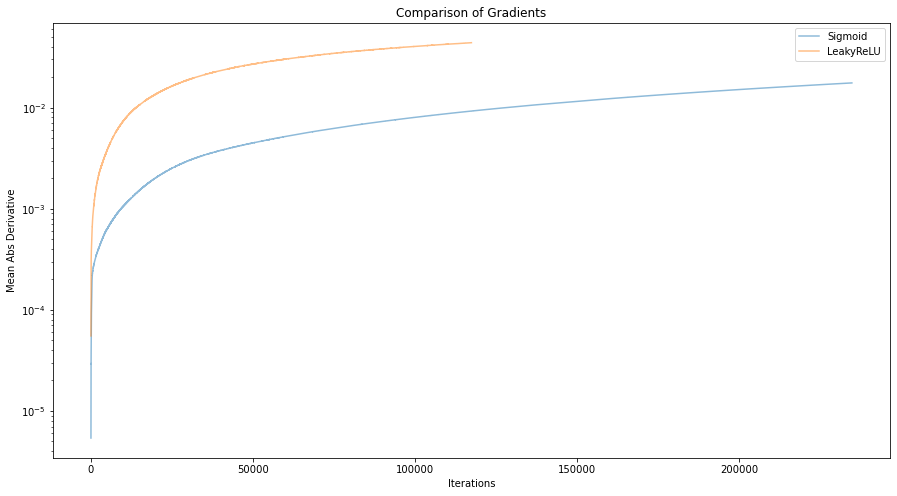

In [97]:
plt.figure(figsize=(15,8))

plt.semilogy(np.array(torch.load('phase_2_baseline_losses')[-1])[:,-1],alpha=.5)
plt.semilogy(np.array(torch.load('phase_2_lr_losses')[-1])[:,-1],alpha=.5)

plt.xlabel('Iterations')
plt.ylabel('Mean Abs Derivative')
plt.title('Comparison of Gradients')
plt.legend(labels=['Sigmoid','LeakyReLU']);

### Accuracies

In [98]:
acc = np.array(torch.load('phase_2_lr_accuracy'))

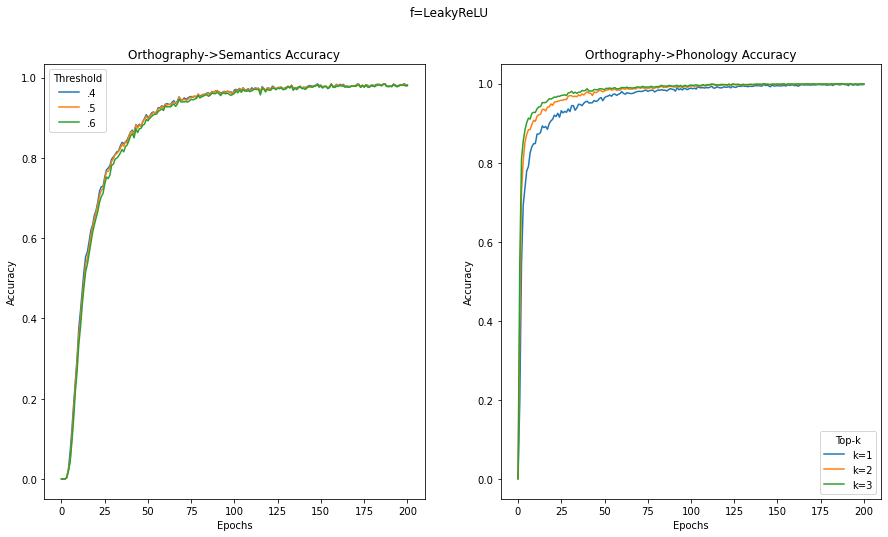

In [99]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
x = np.arange(acc.shape[0]) #* len(s2p)/acc.shape[0]

plt.plot(x,acc[:,1,0],label='.4')
plt.plot(x,acc[:,1,1],label='.5')
plt.plot(x,acc[:,1,2],label='.6')

plt.title('Orthography->Semantics Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(title='Threshold')

plt.subplot(1,2,2)
x = np.arange(acc.shape[0]) #* len(s2p)/acc.shape[0]

plt.plot(x,acc[:,0,0],label='k=1')
plt.plot(x,acc[:,0,1],label='k=2')
plt.plot(x,acc[:,0,2],label='k=3')

plt.title('Orthography->Phonology Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(title='Top-k')

plt.suptitle('f=LeakyReLU');

In [8]:
acc = np.array(torch.load('phase_2_baseline_accuracy'))

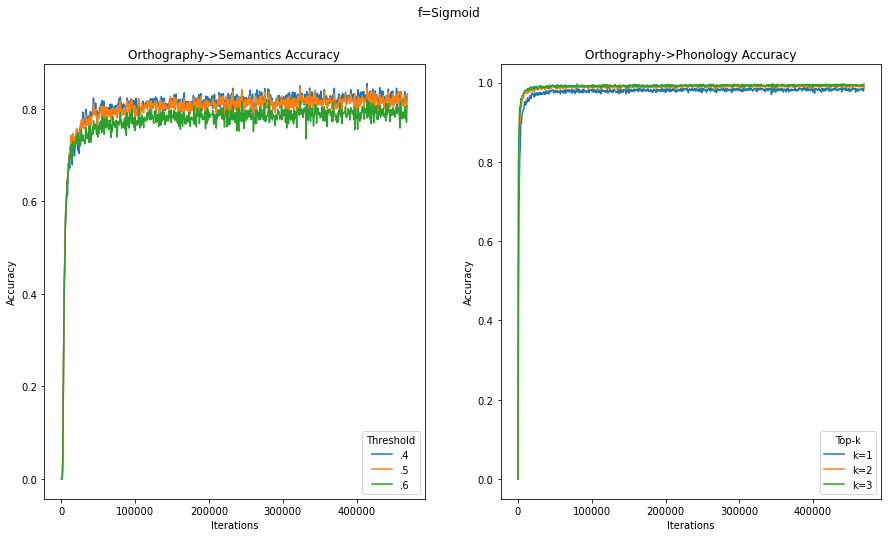

In [9]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
x = 5861/10 * np.arange(acc.shape[0]) #* len(s2p)/acc.shape[0]

plt.plot(x,acc[:,1,0],label='.4')
plt.plot(x,acc[:,1,1],label='.5')
plt.plot(x,acc[:,1,2],label='.6')

plt.title('Orthography->Semantics Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(title='Threshold')

plt.subplot(1,2,2)
x = 5861/10 * np.arange(acc.shape[0]) #* len(s2p)/acc.shape[0]

plt.plot(x,acc[:,0,0],label='k=1')
plt.plot(x,acc[:,0,1],label='k=2')
plt.plot(x,acc[:,0,2],label='k=3')

plt.title('Orthography->Phonology Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(title='Top-k')

plt.suptitle('f=Sigmoid');

![title](harm_and_siedenberg2.png)

## Strain Data

In [2]:
from train import compute_phon_accuracy,compute_semantic_accuracy
from dataset import Monosyllabic_Dataset
from model import ModelConfig
import pandas as pd
import tqdm.auto

In [3]:
dataset = Monosyllabic_Dataset('df_train.csv','phonetic_features.txt','sem_train.npz')

config = ModelConfig(orth_dim=110,phon_dim=250,sem_dim=2446)
model = config.create_model(output_func=[lambda x: x, lambda x: x])
model.load_state_dict(torch.load('ckpts/baseline_790',map_location=torch.device('cpu')))

<All keys matched successfully>

In [4]:
strain = pd.read_csv('strain.csv')

orthography,phonology = strain['ort'],strain['pho']
frq,con = strain['frequency'],strain['pho_consistency']
frq,con = (frq=='HF').astype(float),(con=='CON').astype(float)
img = strain['imageability']
img = (img=='HI').astype(float)

img_values = strain['img']
frq_values = strain['wf']

In [5]:
results = []
embedding_table = torch.Tensor(dataset.phonology_tokenizer.embedding_table.to_numpy())
for idx in tqdm.tqdm(range(len(orthography)),position=0):
    orthography_tensor = dataset.orthography_tokenizer(orthography.iloc[idx])[None]
    phonology_tensor = dataset.phonology_tokenizer(phonology.iloc[idx])[None]
    
    with torch.no_grad():
        predicted_phonology,_ = model(0,4,1/3,orthography=orthography_tensor)
        results.append([frq[idx],con[idx],img[idx],(phonology_tensor-predicted_phonology[4::]).pow(2).sum().item(),
                        compute_phon_accuracy(predicted_phonology[-1][None],phonology_tensor,embedding_table,k=1).mean().item(),
                       frq_values[idx],img_values[idx]])

100%|██████████| 160/160 [00:03<00:00, 52.94it/s]


### Frequency, Consistency, & Imageability

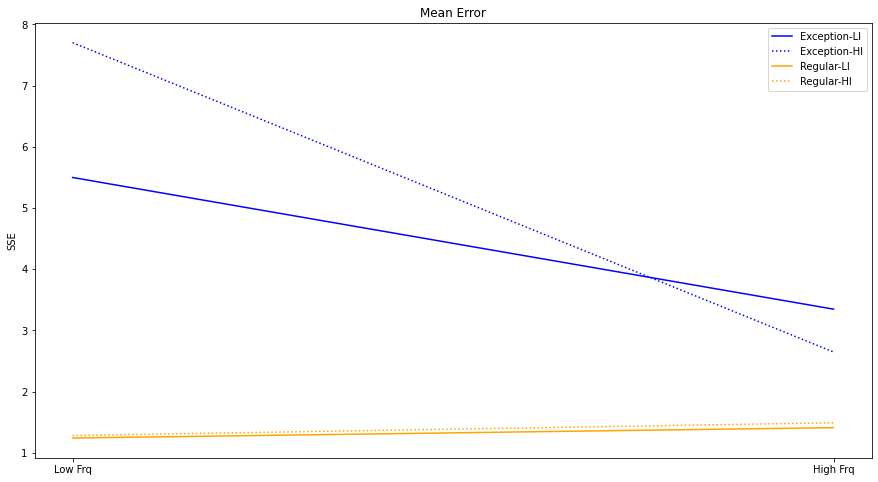

In [6]:
results = np.array(results)

plt.figure(figsize=(15,8))
plt.plot([0,1],[np.mean(results[:,3][np.logical_and(np.logical_and(results[:,2]==0,results[:,1]==0),results[:,0]==0)]),
                np.mean(results[:,3][np.logical_and(np.logical_and(results[:,2]==0,results[:,1]==0),results[:,0]==1)])],
         label='Exception-LI',color='blue')
plt.plot([0,1],[np.mean(results[:,3][np.logical_and(np.logical_and(results[:,2]==1,results[:,1]==0),results[:,0]==0)]),
                np.mean(results[:,3][np.logical_and(np.logical_and(results[:,2]==1,results[:,1]==0),results[:,0]==1)])],
         label='Exception-HI',color='blue',linestyle=':')
plt.plot([0,1],[np.mean(results[:,3][np.logical_and(np.logical_and(results[:,2]==0,results[:,1]==1),results[:,0]==0)]),
                np.mean(results[:,3][np.logical_and(np.logical_and(results[:,2]==0,results[:,1]==1),results[:,0]==1)])],
         label='Regular-LI',color='orange')
plt.plot([0,1],[np.mean(results[:,3][np.logical_and(np.logical_and(results[:,2]==1,results[:,1]==1),results[:,0]==0)]),
                np.mean(results[:,3][np.logical_and(np.logical_and(results[:,2]==1,results[:,1]==1),results[:,0]==1)])],
         label='Regular-HI',color='orange',linestyle=':')
plt.ylabel('SSE')
plt.legend()
plt.title('Mean Error')
plt.xticks([0,1],['Low Frq','High Frq']);

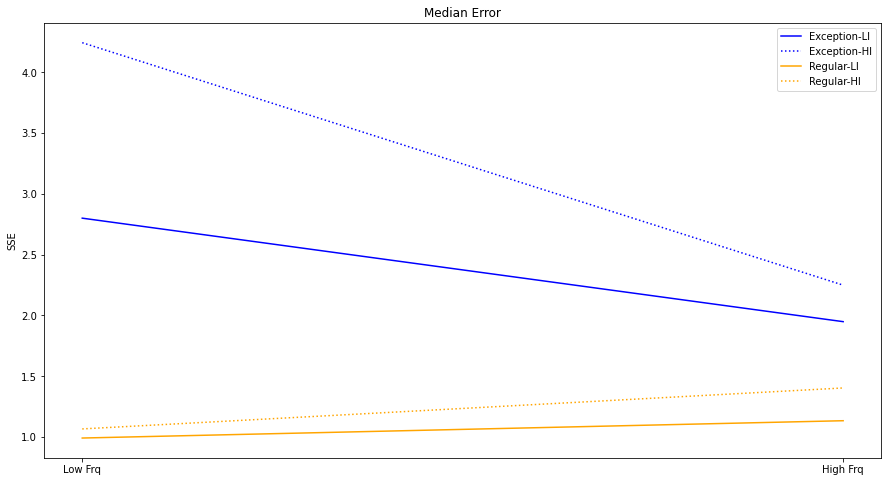

In [7]:
results = np.array(results)

plt.figure(figsize=(15,8))
plt.plot([0,1],[np.median(results[:,3][np.logical_and(np.logical_and(results[:,2]==0,results[:,1]==0),results[:,0]==0)]),
                np.median(results[:,3][np.logical_and(np.logical_and(results[:,2]==0,results[:,1]==0),results[:,0]==1)])],
         label='Exception-LI',color='blue')
plt.plot([0,1],[np.median(results[:,3][np.logical_and(np.logical_and(results[:,2]==1,results[:,1]==0),results[:,0]==0)]),
                np.median(results[:,3][np.logical_and(np.logical_and(results[:,2]==1,results[:,1]==0),results[:,0]==1)])],
         label='Exception-HI',color='blue',linestyle=':')
plt.plot([0,1],[np.median(results[:,3][np.logical_and(np.logical_and(results[:,2]==0,results[:,1]==1),results[:,0]==0)]),
                np.median(results[:,3][np.logical_and(np.logical_and(results[:,2]==0,results[:,1]==1),results[:,0]==1)])],
         label='Regular-LI',color='orange')
plt.plot([0,1],[np.median(results[:,3][np.logical_and(np.logical_and(results[:,2]==1,results[:,1]==1),results[:,0]==0)]),
                np.median(results[:,3][np.logical_and(np.logical_and(results[:,2]==1,results[:,1]==1),results[:,0]==1)])],
         label='Regular-HI',color='orange',linestyle=':')
plt.ylabel('SSE')
plt.legend()
plt.title('Median Error')
plt.xticks([0,1],['Low Frq','High Frq']);

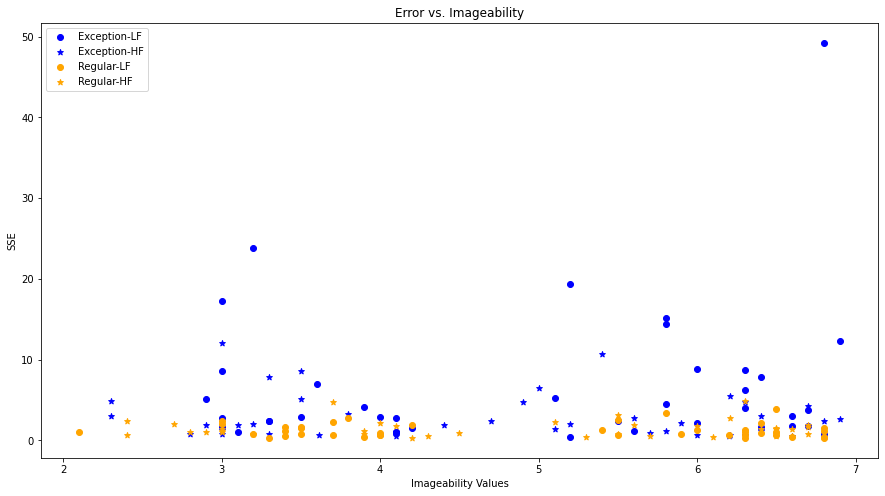

In [8]:
results = np.array(results)

plt.figure(figsize=(15,8))

mask = np.logical_and(results[:,1]==0,results[:,0]==0)
plt.scatter(results[:,-1][mask],results[:,3][mask],label='Exception-LF',color='blue')

mask = np.logical_and(results[:,1]==0,results[:,0]==1)
plt.scatter(results[:,-1][mask],results[:,3][mask],label='Exception-HF',color='blue',marker='*')

mask = np.logical_and(results[:,1]==1,results[:,0]==0)
plt.scatter(results[:,-1][mask],results[:,3][mask],label='Regular-LF',color='orange')

mask = np.logical_and(results[:,1]==1,results[:,0]==1)
plt.scatter(results[:,-1][mask],results[:,3][mask],label='Regular-HF',color='orange',marker='*')

plt.ylabel('SSE')
plt.xlabel('Imageability Values')
plt.legend()
plt.title('Error vs. Imageability');

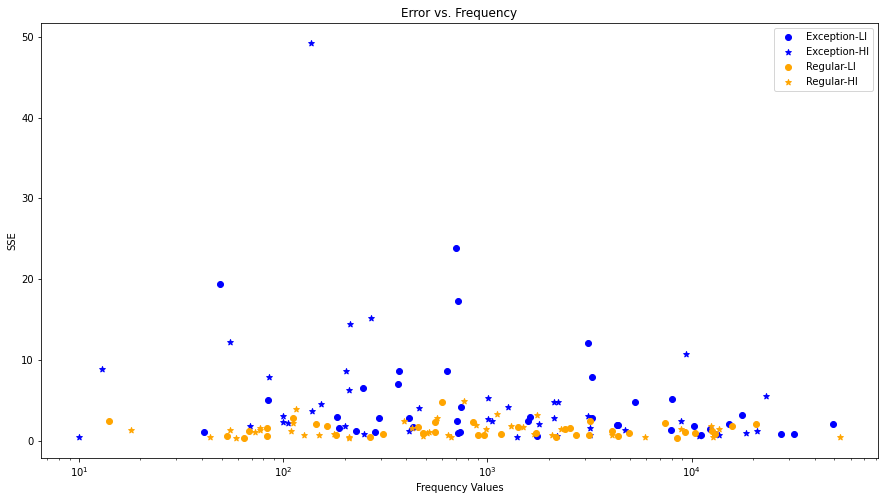

In [9]:
results = np.array(results)

plt.figure(figsize=(15,8))

mask = np.logical_and(results[:,1]==0,results[:,2]==0)
plt.scatter(results[:,-2][mask],results[:,3][mask],label='Exception-LI',color='blue')

mask = np.logical_and(results[:,1]==0,results[:,2]==1)
plt.scatter(results[:,-2][mask],results[:,3][mask],label='Exception-HI',color='blue',marker='*')

mask = np.logical_and(results[:,1]==1,results[:,2]==0)
plt.scatter(results[:,-2][mask],results[:,3][mask],label='Regular-LI',color='orange')

mask = np.logical_and(results[:,1]==1,results[:,2]==1)
plt.scatter(results[:,-2][mask],results[:,3][mask],label='Regular-HI',color='orange',marker='*')

plt.ylabel('SSE')
plt.xlabel('Frequency Values')
plt.xscale('log')
plt.legend()
plt.title('Error vs. Frequency');

### Correlations Across Training

In [10]:
correlations = []
for idx in range(10,400,10):
    model.load_state_dict(torch.load(f'ckpts/baseline_{idx}',map_location=torch.device('cpu')))
    
    results = []
    embedding_table = torch.Tensor(dataset.phonology_tokenizer.embedding_table.to_numpy())
    for idx in tqdm.tqdm(range(len(orthography)),position=0):
        orthography_tensor = dataset.orthography_tokenizer(orthography.iloc[idx])[None]
        phonology_tensor = dataset.phonology_tokenizer(phonology.iloc[idx])[None]

        with torch.no_grad():
            predicted_phonology,_ = model(0,4,1/3,orthography=orthography_tensor)
            results.append([frq[idx],con[idx],img[idx],(phonology_tensor-predicted_phonology[-4::]).pow(2).sum().item(),
                            compute_phon_accuracy(predicted_phonology[-1][None],phonology_tensor,embedding_table,k=1).mean().item()])
    results = np.array(results)
    correlations.append([np.corrcoef(results[:,3],results[:,0])[0,1],
                        np.corrcoef(results[:,3],results[:,1])[0,1],
                        np.corrcoef(results[:,3],results[:,2])[0,1]])

100%|██████████| 160/160 [00:02<00:00, 53.72it/s]


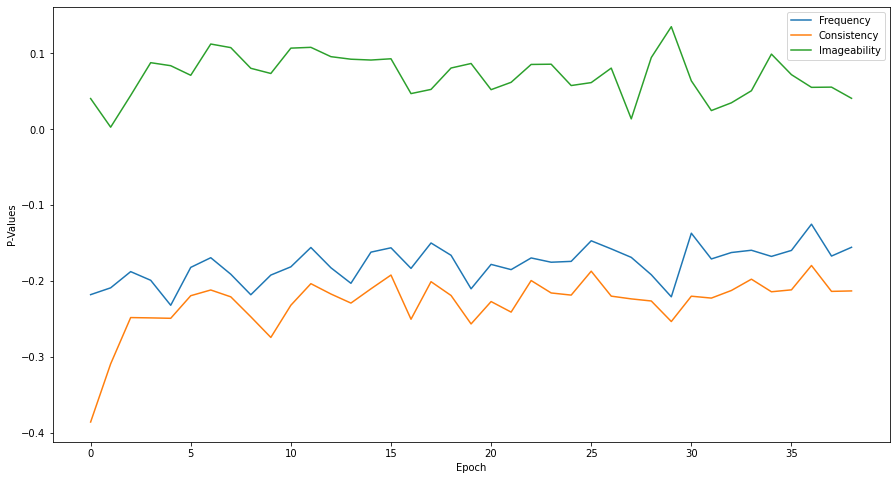

In [11]:
plt.figure(figsize=(15,8))

x = np.arange(len(correlations))
y = np.array(correlations)

plt.plot(x,y[:,0],label='Frequency')
plt.plot(x,y[:,1],label='Consistency')
plt.plot(x,y[:,2],label='Imageability')

plt.legend()
plt.ylabel('P-Values')
plt.xlabel('Epoch');

## Nonwords Analysis

In [120]:
import pandas as pd
from train import compute_phon_accuracy,compute_semantic_accuracy,kl_divergence
from dataset import Monosyllabic_Dataset
from model import ModelConfig
import tqdm

In [121]:
dataset = Monosyllabic_Dataset('df_train.csv','phonetic_features.txt','sem_train.npz')

In [122]:
nonwords = pd.read_csv('nonwords.csv')

nonwords_orth = nonwords['ort']
nonwords_phon_large = nonwords['pho_large']
nonwords_phon_small = nonwords['pho_small']
nonwords_type = nonwords['condition']
nonwords_type = (nonwords_type=='unambiguous').astype(float)

## Accuracies Across Training

In [124]:
accuracies = []
for idx in range(10,390,10):
    model.load_state_dict(torch.load(f'ckpts/baseline_{idx}',map_location=torch.device('cpu')))

    results = []
    embedding_table = torch.Tensor(dataset.phonology_tokenizer.embedding_table.to_numpy())
    for idx in tqdm.tqdm(range(len(nonwords_orth)),position=0):
        orthography_tensor = dataset.orthography_tokenizer(nonwords_orth.iloc[idx])[None]
        phonology_long_tensor = dataset.phonology_tokenizer(nonwords_phon_large.iloc[idx])[None]
        phonology_short_tensor = dataset.phonology_tokenizer(nonwords_phon_small.iloc[idx])[None]

        with torch.no_grad():
            predicted_phonology,_ = model(0,4,1/3,orthography=orthography_tensor)
            results.append([nonwords_type[idx],
                                    compute_phon_accuracy(predicted_phonology[-1][None],
                                                          phonology_long_tensor,embedding_table,k=1)
                                    .mean().item(),
                                    compute_phon_accuracy(predicted_phonology[-1][None],
                                                          phonology_short_tensor,embedding_table,k=1)
                                    .mean().item()
                           ])
            
    results = np.array(results)
    accuracies.append([np.mean(results[:,1][results[:,0]==0]),np.mean(results[:,2][results[:,0]==0]),
                               np.mean(results[:,1][results[:,0]==1]),np.mean(results[:,2][results[:,0]==1])])

100%|██████████| 120/120 [00:02<00:00, 58.61it/s]


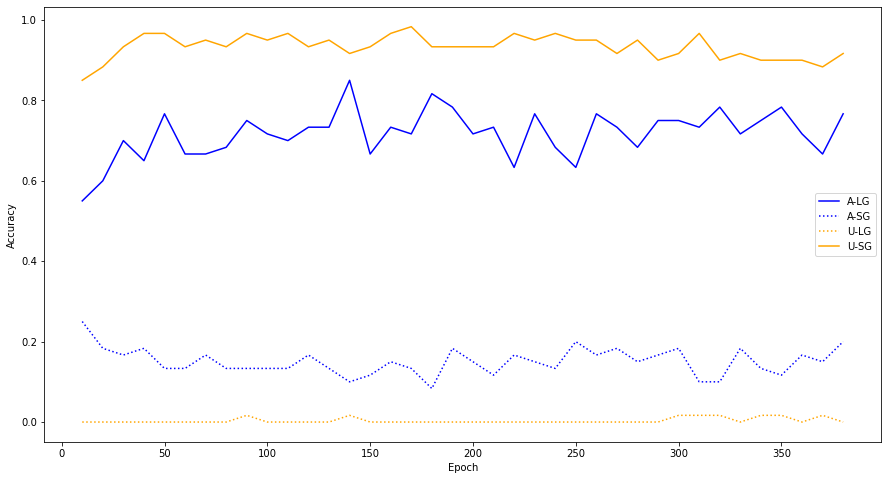

In [126]:
plt.figure(figsize=(15,8))

x = np.arange(10,390,10)
y = np.array(accuracies)

plt.plot(x,y[:,0],label='A-LG',color='blue')
plt.plot(x,y[:,1],label='A-SG',color='blue',linestyle=':')
plt.plot(x,y[:,2],label='U-LG',color='orange',linestyle=':')
plt.plot(x,y[:,3],label='U-SG',color='orange')

plt.legend()

plt.ylabel('Accuracy')
plt.xlabel('Epoch');

In [130]:
print(np.sum([np.mean(results[:,1][results[:,0]==0]),np.mean(results[:,2][results[:,0]==0])]),
        np.sum([np.mean(results[:,1][results[:,0]==1]),np.mean(results[:,2][results[:,0]==1])]))

TypeError: unhashable type: 'slice'

In [127]:
results = {}

for idx in range(len(nonwords)):
    orthography_tensor = dataset.orthography_tokenizer(nonwords['ort'][idx])[None]
    predicted_phonology,_ = model(0,4,1/3,orthography=orthography_tensor)

    embedding_table = torch.Tensor(dataset.phonology_tokenizer.embedding_table.to_numpy())
    embedding_index = dataset.phonology_tokenizer.embedding_table.index        
    
    results[nonwords['ort'][idx]]=[]
    for t,p in enumerate(predicted_phonology):
        predictions = torch.norm(p.view(10,1,25) - embedding_table[None],dim=-1).argmin(dim=1)
        predictions = ''.join(embedding_index[predictions])
        
        if predictions == nonwords['pho_large'][idx]:
            results[nonwords['ort'][idx]].append([1,0])
        elif predictions == nonwords['pho_small'][idx]:
            results[nonwords['ort'][idx]].append([0,1])
        else:
            results[nonwords['ort'][idx]].append([0,0])

In [128]:
ambiguous, unambiguous = [],[]
for idx in range(len(nonwords)):
    if nonwords['condition'][idx] == 'ambiguous':
        ambiguous.append(results[nonwords['ort'][idx]])
    else:
        unambiguous.append(results[nonwords['ort'][idx]])
        
ambiguous, unambiguous = np.array(ambiguous),np.array(unambiguous)

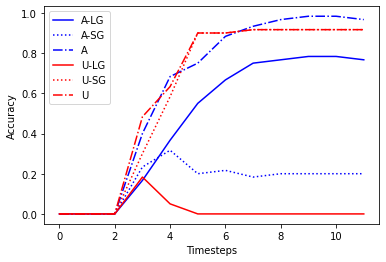

In [129]:
plt.plot(np.arange(12),np.mean(ambiguous[:,:,0],axis=0),color='blue')
plt.plot(np.arange(12),np.mean(ambiguous[:,:,1],axis=0),color='blue',linestyle=':')
plt.plot(np.arange(12),np.mean(np.logical_or(ambiguous[:,:,1],ambiguous[:,:,0]).astype(float),
                               axis=0),color='blue',linestyle='dashdot')

plt.plot(np.arange(12),np.mean(unambiguous[:,:,0],axis=0),color='red')
plt.plot(np.arange(12),np.mean(unambiguous[:,:,1],axis=0),color='red',linestyle=':')
plt.plot(np.arange(12),np.mean(np.logical_or(unambiguous[:,:,1],unambiguous[:,:,0]).astype(float),
                               axis=0),color='red',linestyle='dashdot')

plt.legend(['A-LG','A-SG','A','U-LG','U-SG','U'])
plt.xlabel('Timesteps')
plt.ylabel('Accuracy');